In [2]:
import numpy as np
from scipy import integrate
import scipy.stats as sps

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

def plotDist(d, x, ax, title):
    c1 = sns.color_palette()[0]
    c2 = sns.color_palette()[3]
    pdf = ax.plot(x, d.pdf(x), alpha=.6, color=c1, label="PDF")[0]
    ax1 = ax.twinx()
    ax1.plot(x, d.cdf(x), color=c2, ls='--')
    cdf = mpl.lines.Line2D([], [], color=c2, label='CDF')
    ax1.set_ylim(0, 1.1)
    ax.legend(handles=[pdf, cdf], loc='best')
    ax.axvline(d.mean(), color='black')
    ax.set_title(title, fontsize='xx-large')
    ax.get_figure().set_figwidth(10)
    ax.get_figure().set_figheight(6)
    print(f"variance = {d.var():.2f}")
    print(f"mean     = {d.mean():.2f}")

# Continuous Distributions

## Normal Distribution

The normal (also called Gaussian) distribution is the most used and most important distribution in statistics. It has two parameters - $\mu$ and $\sigma^2$ which are respectively its mean and variance. Its PDF is defined as:

$$
f(x) = \frac{1}{\sqrt{2\pi}\sigma}\exp\Big\{-\frac{(x - \mu)^2}{2\sigma^2} \Big\}\;\;\;\;(-\infty < x < \infty)
$$

The normal distribution describes a lot of natural phenomena. Some examples are:

- The average height of some group of people
- The average test scores of some group of people

---


The mean and variance of the normal distribution are its parameters itself, therefore:

$$
E(X) = \mu \;\;\;\; V(X) = \sigma^2
$$

However, it has another very important property - that any linear transformation of $X$ also obeys a normal distribution. Namely, given $X\sim N(\mu, \sigma^2)$, we have:

$$
aX + b \sim N(a\mu + b, a^2\sigma^2)
$$

#### TODO: Proof

We can use this to derive the random variable $Z = \frac{X - \mu}{\sigma}$ which would obey $N(0, 1)$. This $N(0, 1)$ is called the **standard normal distribution**, while the process of subtracting the mean and dividing by the deviation is called **standardization**.

Plotting the standard normal distribution, we have:

In [3]:
plotDist(sps.norm(), np.linspace(-3, 3), plt.gca(), "Standard Normal Distribution")

variance = 1.00
mean     = 0.00


---
### The upper $\alpha$%

Oftentimes it is useful to know how much of the data is above the mean. The function, which tells us the percentage of data above a given points $x$ is called the **survival function**. Conversely, a function which tells us the point above which $\alpha$ percent of the data lie is called the **inverse survivial function**.

For example, the upper 30% of the standard normal distribution would be:

0.5244005127080409

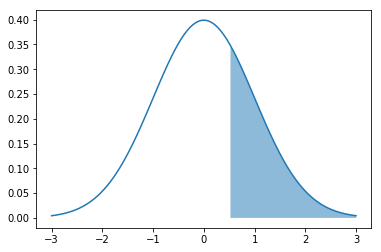

In [4]:
ax = plt.gca()
X = np.linspace(-3, 3, 100)
rv = sps.norm()
ax.plot(X, rv.pdf(X))
up30 = rv.isf(0.3)
X1 = np.linspace(up30, 3)
ax.fill_between(X1, rv.pdf(X1), alpha=.5)
up30

We see that the upper 30% point of the data is $0.52$.

---
Since the standard normal distribution is symmetric with respect to the $y$ axis, the upper $\alpha\%$ and lower $\alpha\%$ points satisfy the equality:

$$
z_\alpha = -z_{1 - \alpha}
$$

## Exponential Distribution

The exponential distribution describes the interval of time between events, given an average rate of occurrance. In other words, it tells us, given an average rate of occurance $\lambda$, how likely it is for an event to occur after $X$ amount of time.

Its PDF is defined as:

$$
f(x) = \begin{cases}
\lambda e^{-\lambda x} & x \geq 0 \\
0 & otherwise
\end{cases}
$$

#### TODO: Proof, relation to Poisson

Plotted, it looks like this:

variance = 0.11
mean     = 0.33


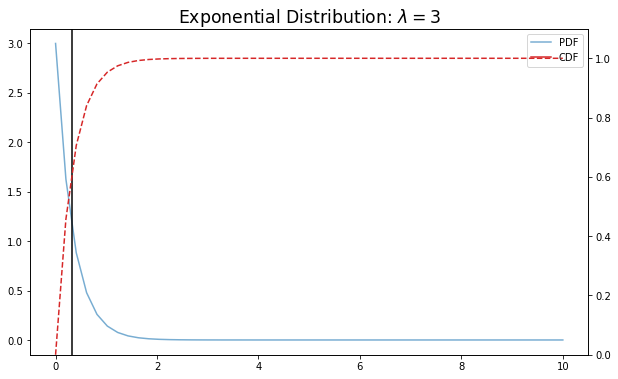

In [5]:
L = 3
plotDist(sps.expon(scale=1/L), np.linspace(0, 10), plt.gca(), f"Exponential Distribution: $\lambda = {L:.0f}$")

### Mean and Variance

$$
\begin{aligned}
\mu &= E(X) \\
&= \int_0^{\infty}x\lambda e^{-\lambda x}dx \\
&= \frac{1}{\lambda}\int_0^\infty ye^{-y}dy \\
&= \frac{1}{\lambda}\bigg[ -ye^{-y} - e^{-y}  \bigg]_0^\infty \\
&= \frac{1}{\lambda}
\end{aligned}
$$

$$
\begin{aligned}
\sigma^2 &= E(X^2) - \mu^2 \\
&= \int_0^\infty x^2\lambda e^{-\lambda x}dx - \mu^2 \\
&= \frac{1}{\lambda^2}\int_0^\infty y^2e^{-y}dy -\mu^2 \\
&= \frac{1}{\lambda^2}\bigg[ -y^2e^{-y} +2(-ye^{-y} - e^{-y}) \bigg]_0^\infty - \mu^2 \\
&= \frac{1}{\lambda^2}\bigg[ y^2e^{-y} + 2(ye^{-y} + e^{-y}) \bigg]^0_\infty - \mu^2 \\
&= \frac{2}{\lambda^2} - \frac{1}{\lambda^2} \\
&= \frac{1}{\lambda^2}
\end{aligned}
$$

## Chi-Square Distribution

The chi-square distribution is used in interval inference and proving independence. It is defined by multiple **independent** standard normal distributions in the following way:

$$
Z_1, Z_2,...,Z_n \sim N(0, 1)
$$
$$
Y = \sum_{i = 1}^nZ_i^2
$$

This is called a **chi-square distribution with $n$ degrees of freedom** and is denoted as $\chi^2(n)$.

---
Let us try constructing a $\chi^2(10)$ distribution. We will take 10 independent samples from a standard normal distribution - this is the $n$ - and repeat this 1,000,000 times. 

In [6]:
n = 10
N = int(1e6)
rv = sps.norm()
Zs = rv.rvs((n, N))
chi2 = np.sum(Zs ** 2, axis=0)
fig,ax = plt.subplots(1, 1, figsize=(10, 6))
_ = ax.hist(chi2, alpha=.5, bins=100, density=True, range=(0, 30), label="Sample frequency")
X = np.linspace(0, 30, 100)
ax.plot(X, sps.chi2(10).pdf(X), label=f"Real $\chi^2({n})$")
ax.legend()

---
We can see that the graph is slanted to the right. Let's see how different degrees of freedom compare:

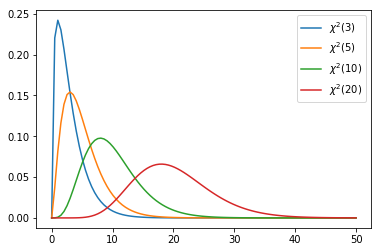

In [7]:
X = np.linspace(0, 50, 100)
ax = plt.gca()
for n in [3, 5, 10, 20]:
    ax.plot(X, sps.chi2(n).pdf(X), label=f"$\chi^2({n})$")
ax.legend()

We can see that the higher the degrees of freedom, the more it resembles the normal distribution.

## t Distribution

The t distribution is used when estimating an interval for the population mean. It is defined by a standard normal distribution and a $\chi^2$ distribution, independent of each other:

$$
t = \frac{Z}{\sqrt{\frac{Y}{n}}}
$$

We call this a **t distribution with $n$ degrees of freedom**

Again, let us construct this manually first:

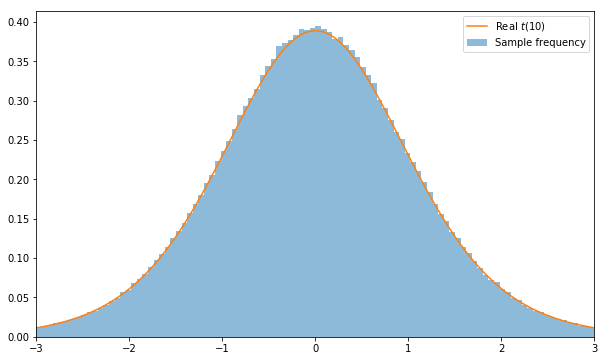

In [13]:
n = 10
N = int(1e6)
rv_n = sps.norm()
rv_c = sps.chi2(n)
Y = rv_c.rvs(N)
Z = rv_n.rvs(N)
t = Z / np.sqrt(Y / n)
fig,ax = plt.subplots(1, 1, figsize=(10, 6))
x0,x1 = -3, 3
_ = ax.hist(t, alpha=.5, bins=100, density=True, range=(x0, x1), label="Sample frequency")
X = np.linspace(x0, x1, 100)
ax.plot(X, sps.t(n).pdf(X), label=f"Real $t({n})$")
ax.set_xlim(x0, x1)
ax.legend()

---
And now let's compare different degrees of freedom:

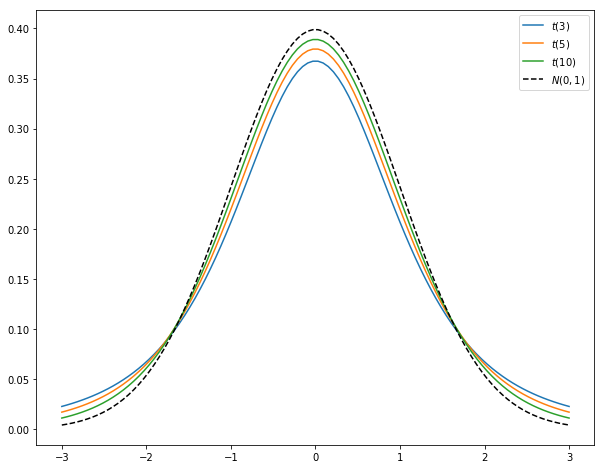

In [29]:
X = np.linspace(-3, 3, 100)
fig,ax = plt.subplots(1, 1, figsize=(10, 8))
for n in [3, 5, 10]:
    ax.plot(X, sps.t(n).pdf(X), label=f"$t({n})$")
ax.plot(X, sps.norm().pdf(X), label=f"$N(0,1)$", color='black', ls='--')
ax.legend()

The t distribution has the following important properties:

- It is symmetric with respect to the $y$ axis
- Its sleeves are thicker than that of $N(0, 1)$
- The higher the degrees of freedom, the more it resembles $N(0,1)$

## F Distribution

The F distribution is used in variance analysis. It is defined by two independent $\chi^2$ distributions:

$$
F = \frac{Y_1 / n_1}{Y_2 / n_2}
$$

We call this an **F distribution with $n_1$ and $n_2$ degrees of freedom**.

Let us construct one:

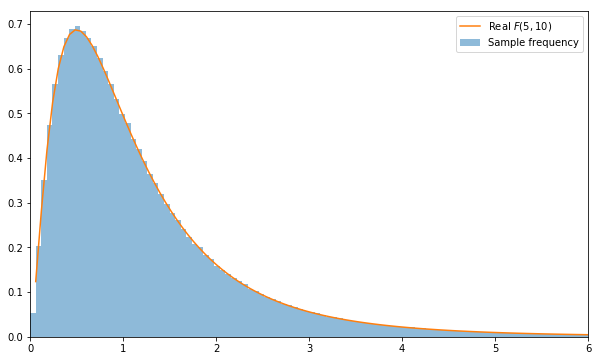

In [32]:
n1, n2= 5, 10
N = int(1e6)
rv1 = sps.chi2(n1)
rv2 = sps.chi2(n2)
Y1 = rv1.rvs(N)
Y2 = rv2.rvs(N)
F = (Y1 / n1) / (Y2 / n2)
fig,ax = plt.subplots(1, 1, figsize=(10, 6))
x0,x1 = 0, 6
_ = ax.hist(F, alpha=.5, bins=100, density=True, range=(x0, x1), label="Sample frequency")
X = np.linspace(x0, x1, 100)[1:]
ax.plot(X, sps.f(n1, n2).pdf(X), label=f"Real $F({n1}, {n2})$")
ax.set_xlim(x0, x1)
ax.legend()

---
And comparing different degrees of freedom:

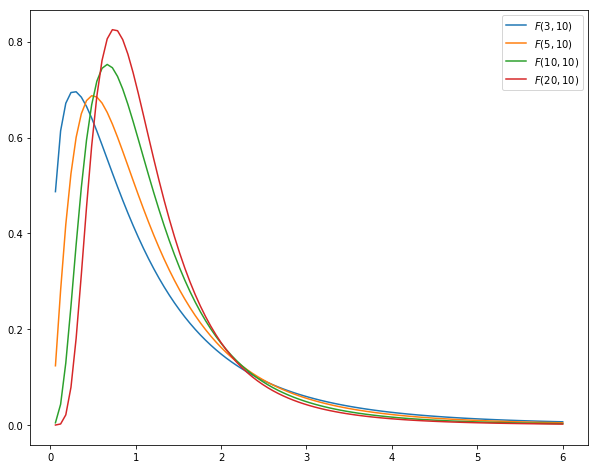

In [40]:
X = np.linspace(0, 6, 100)[1:]
fig,ax = plt.subplots(1, 1, figsize=(10, 8))
for n in [3, 5, 10, 20]:
    ax.plot(X, sps.f(n, 10).pdf(X), label=f"$F({n}, 10)$")
ax.legend()

It's important to note that the peak of the F distribution lies close to $1$.